# Model Building

## Attaching Resources

### Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold,cross_val_score,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,GradientBoostingClassifier,VotingClassifier,StackingClassifier, BaggingClassifier
from sklearn.svm import SVC
import pickle

from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (15,8)
plt.rcParams['figure.dpi'] = 250
sns.set_style(style='darkgrid')
plt.tight_layout()
%matplotlib inline

<Figure size 3750x2000 with 0 Axes>

### Adding Dataset

In [2]:
x = pd.read_csv('x.csv')
y = pd.read_csv('y.csv')

x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.318367,-0.649840,-0.251797,1.071645,0.718537,-0.167296,0.253946,0.318079,0.088429,-0.492360,...,0.384736,0.059927,0.701642,-0.151515,0.092097,0.026428,-0.406467,0.303931,-0.094906,0.480088
1,-1.318367,0.822546,-0.009900,-0.422759,0.097936,0.138683,-0.157271,0.063152,0.077636,-0.998637,...,-0.159752,-0.180735,-0.773467,0.275448,-0.600963,0.116422,0.161136,-0.061015,0.045717,-0.346933
2,-1.318244,-0.649001,-1.156332,0.590421,0.052309,-0.293945,1.264052,0.759926,0.206690,-2.028202,...,0.849499,0.368838,1.496474,1.904821,-1.196328,-1.036280,-0.316341,-0.179734,-0.247012,1.769279
3,-1.318244,-0.422758,-0.332049,0.602897,-0.777207,0.084662,0.846383,0.316486,0.309696,-1.923850,...,-0.395821,-0.044465,0.262954,-0.312504,-2.024873,1.235098,-0.465593,0.122573,0.229403,0.333067
4,-1.318120,-0.533526,0.426592,0.448860,0.067827,-0.220200,-0.022690,0.600981,-0.204673,-0.121202,...,0.651684,0.070223,1.539285,-0.205921,0.218755,-0.752928,0.839351,0.523766,0.833505,0.031877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14424,1.845252,0.957465,-1.098962,0.029717,-1.110164,-1.469192,-0.571545,-1.035085,0.075523,-2.120921,...,-0.725221,0.070325,0.665691,0.121917,0.824620,0.254557,-0.298593,0.055264,0.055173,-0.250626
14425,1.845623,0.894525,-0.789691,0.261510,-0.577485,-1.224903,-0.328953,-0.921469,0.157094,-1.003024,...,-0.017341,0.497650,1.959508,-0.077909,0.967058,0.609330,-0.198231,0.072936,0.044811,-0.355038
14426,1.845869,-0.469927,0.351015,0.252557,-0.653213,0.932479,0.538178,0.456033,0.359660,-0.975447,...,-0.682781,0.023443,-0.063975,0.234277,-1.785624,-1.930880,-0.080771,-0.369420,0.523902,-0.341923
14427,1.845993,0.800951,-0.392282,-0.590623,-0.425395,-0.174530,-0.543430,0.132672,0.019081,-0.795147,...,-0.177948,0.071751,-0.027415,0.033544,0.103274,0.145451,2.460815,-0.384152,-0.085920,-0.081203


## K-fold Cross Validation

In [3]:
kf = KFold(n_splits=10)

mod = [LogisticRegression(), KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier(), SVC()]

for i in range(len(mod)):
    kf_scores = cross_val_score(mod[i],x,y,cv=kf)
    print('Creating Model With ' + str(mod[i]))
    print('Testing Accuracy of are Model is : ' + str(kf_scores.mean()))
    print('Printing All Training Model Accuracy : \n' + str(kf_scores))
    print('\n')

Creating Model With LogisticRegression()
Testing Accuracy of are Model is : 0.9975049572136951
Printing All Training Model Accuracy : 
[0.998614   0.999307   1.         0.998614   0.99168399 0.999307
 1.         0.99376299 0.997228   0.99653259]


Creating Model With KNeighborsClassifier()
Testing Accuracy of are Model is : 0.9981979579066959
Printing All Training Model Accuracy : 
[0.998614   1.         1.         0.999307   0.995149   0.999307
 0.997228   0.995842   1.         0.99653259]


Creating Model With DecisionTreeClassifier()
Testing Accuracy of are Model is : 0.9985443140782946
Printing All Training Model Accuracy : 
[0.997228   1.         1.         0.999307   0.999307   0.998614
 1.         0.997228   0.999307   0.99445215]


Creating Model With RandomForestClassifier()
Testing Accuracy of are Model is : 0.9992375550627977
Printing All Training Model Accuracy : 
[0.998614   1.         1.         1.         0.999307   1.
 1.         0.996535   1.         0.99791956]


Crea

## Splitting The Data Into Traning and Testing Dataset

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [4]:
x_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
7923,0.036236,-1.053253,0.176840,0.466455,-0.280682,0.370797,-0.396219,0.196411,-0.368495,0.948692,...,0.180493,-0.419785,0.271360,-0.252148,0.393991,-2.101191,1.499278,-0.442477,0.739981,-0.216010
1368,-1.186102,-0.219624,0.403059,0.378445,-0.366245,0.670069,0.786187,0.472921,0.411048,-1.184859,...,-0.026463,-0.032502,0.151010,0.317674,-1.685309,-1.413106,0.291643,0.822908,0.411632,-0.291828
11004,1.032540,-1.138298,0.482347,0.120004,-0.151037,0.686327,0.611429,-0.459365,-0.900493,0.731220,...,-1.333486,1.596643,-0.072553,0.089655,-1.230452,-2.054814,0.508269,1.962619,1.016966,-0.113287
4701,-0.803620,0.797976,-0.425843,0.257604,0.073547,-0.626253,0.009573,-0.512749,0.090537,1.224876,...,-0.246694,-0.322746,-0.516528,0.293027,0.155839,-0.177590,1.612805,-0.153807,0.014953,-0.249501
12322,1.353825,-0.271619,1.075090,0.418472,1.792745,0.181774,0.119256,0.217918,0.346242,-1.165321,...,0.268561,0.013117,0.468758,0.133762,0.054083,-1.339488,0.124513,0.664826,0.542406,-0.293629


In [5]:
x_test.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
2200,-1.103190,-0.146525,-2.921427,-0.428322,-0.091529,-1.534747,0.828472,-0.082180,0.240265,-0.890211,...,2.907215,0.816510,0.259666,-1.362534,-0.418882,-0.605656,-0.594412,-0.262070,0.615363,4.639677
7480,-0.050254,-0.023319,0.301952,0.616392,-0.664747,0.203913,-0.320840,0.509589,-0.229902,0.009742,...,0.088918,-0.159287,-0.145032,-0.158831,0.011880,-1.054055,1.348822,-0.978250,-0.907991,-0.312711
6761,-0.261236,-0.110747,0.541453,0.142165,0.650477,-0.315950,0.015917,-0.073881,0.392332,-0.050744,...,-0.214163,-0.159654,-0.372450,0.055253,-0.082310,-1.280759,0.661932,-0.575170,-0.107056,-0.258788
11854,1.209469,-0.223561,0.310339,0.524393,-0.002286,0.604790,0.848259,0.297190,0.369742,0.178648,...,-0.099097,-0.147131,0.393326,0.269807,-1.145304,-0.944556,0.493721,0.703726,0.240968,-0.267512
8745,0.158260,-0.284972,0.481080,0.378756,-0.691650,-0.079286,-0.371337,0.325118,0.031560,0.280127,...,0.285122,-0.212682,-0.394048,0.045044,-0.052119,-0.790078,1.449064,0.323404,0.475841,-0.249501


In [6]:
y_train.head()

,Class
7923,0
1368,0
11004,0
4701,0
12322,0


In [7]:
y_test.head()

,Class
2200,0
7480,0
6761,0
11854,0
8745,0


## Preparing Model From The Dataset

### Picking Model Lowest Training And Testing Difference

In [19]:
def predict(model):
    print('Creating Model With ' + str(model))
    model.fit(x_train,y_train)
    ypred = model.predict(x_test)
    print('Training Accuracy of are Model is : ' + str(round(model.score(x_train,y_train), 2)) + '%')
    print('Testing Accuracy of are Model is : ' + str(round(model.score(x_test,y_test), 2)) + '%')
    print(classification_report(y_test,ypred))

In [20]:
models = [  LogisticRegression(), KNeighborsClassifier(), DecisionTreeClassifier(), BaggingClassifier(DecisionTreeClassifier()),
            RandomForestClassifier(), BaggingClassifier(RandomForestClassifier()), SVC()]

for i in range(len(models)):
    predict(models[i])

Creating Model With LogisticRegression()
Training Accuracy of are Model is : 1.0%
Testing Accuracy of are Model is : 1.0%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2871
           1       1.00      0.53      0.70        15

    accuracy                           1.00      2886
   macro avg       1.00      0.77      0.85      2886
weighted avg       1.00      1.00      1.00      2886

Creating Model With KNeighborsClassifier()
Training Accuracy of are Model is : 1.0%
Testing Accuracy of are Model is : 1.0%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2871
           1       1.00      0.53      0.70        15

    accuracy                           1.00      2886
   macro avg       1.00      0.77      0.85      2886
weighted avg       1.00      1.00      1.00      2886

Creating Model With DecisionTreeClassifier()
Training Accuracy of are Model is : 1.0%
Testing Accura

### Performing Hyperparameter Tuning

#### Tuning Decision Tree Classifier With Bagging Classifier

In [29]:
params = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [2,3,4,5],
    'min_samples_split': [2,3,4,5],
    'min_samples_leaf': [1,2,3,4,5],
    'min_weight_fraction_leaf': [0,1,2,3,4,5],
    'max_features': ['auto', 'sqrt', 'log2']
    }

In [30]:
grid = GridSearchCV(DecisionTreeClassifier(), param_grid=params, n_jobs=-1)

grid.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5],
                         'min_weight_fraction_leaf': [0, 1, 2, 3, 4, 5],
                         'splitter': ['best', 'random']})

In [31]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'log2',
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0,
 'splitter': 'best'}

In [32]:
predict(AdaBoostClassifier( DecisionTreeClassifier( criterion = 'gini', max_depth = 4, max_features = 'sqrt', min_samples_leaf = 4,
                                                    min_samples_split = 4, min_weight_fraction_leaf = 0, splitter = 'best'),
                            learning_rate= 1, n_estimators=100))

Creating Model With AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=4,
                                                    max_features='sqrt',
                                                    min_samples_leaf=4,
                                                    min_samples_split=4,
                                                    min_weight_fraction_leaf=0),
                   learning_rate=1, n_estimators=100)
Training Accuracy of are Model is : 1.0%
Testing Accuracy of are Model is : 1.0%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2871
           1       1.00      0.80      0.89        15

    accuracy                           1.00      2886
   macro avg       1.00      0.90      0.94      2886
weighted avg       1.00      1.00      1.00      2886



#### Tuning Gradient Boosting Classifier

In [34]:
predict(GradientBoostingClassifier())

Creating Model With GradientBoostingClassifier()
Training Accuracy of are Model is : 1.0%
Testing Accuracy of are Model is : 1.0%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2871
           1       1.00      0.93      0.97        15

    accuracy                           1.00      2886
   macro avg       1.00      0.97      0.98      2886
weighted avg       1.00      1.00      1.00      2886



In [35]:
params = {
    'loss' : ['log_loss', 'deviance', 'exponential'],
    'criterion' : ['friedman_mse', 'squared_error'],
    'learning_rate' : [0.1,0.2,0.3,0.4,0.5],
    'max_features' : ['auto', 'sqrt', 'log2'],
    'n_estimators' : [1,2,3,4,5]
    }

In [36]:
grid = GridSearchCV(GradientBoostingClassifier(), param_grid=params, n_jobs = -1)

grid.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'loss': ['log_loss', 'deviance', 'exponential'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [1, 2, 3, 4, 5]})

In [37]:
grid.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.2,
 'loss': 'log_loss',
 'max_features': 'log2',
 'n_estimators': 2}

In [38]:
predict(AdaBoostClassifier(GradientBoostingClassifier(criterion = 'friedman_mse', n_estimators=2, learning_rate = 0.2, loss='log_loss',max_features='log2'),
                           learning_rate= 1.5, n_estimators=100))

Creating Model With AdaBoostClassifier(estimator=GradientBoostingClassifier(learning_rate=0.2,
                                                        max_features='log2',
                                                        n_estimators=2),
                   learning_rate=1.5, n_estimators=100)
Training Accuracy of are Model is : 1.0%
Testing Accuracy of are Model is : 1.0%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2871
           1       1.00      0.80      0.89        15

    accuracy                           1.00      2886
   macro avg       1.00      0.90      0.94      2886
weighted avg       1.00      1.00      1.00      2886



#### Tuning Random Forest Classifier With Bagging Classifier

In [10]:
params = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'n_estimators' : [10,20,30,40,50],
    'max_depth': [2,3,4,5],
    'min_samples_split': [2,3,4,5],
    'min_samples_leaf': [1,2,3,4,5],
    'min_weight_fraction_leaf': [0,1,2,3,4,5],
    'max_features': ['sqrt', 'log2']
    }

In [11]:
grid = GridSearchCV((RandomForestClassifier()), param_grid=params, n_jobs= -1)

grid.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5],
                         'min_weight_fraction_leaf': [0, 1, 2, 3, 4, 5],
                         'n_estimators': [10, 20, 30, 40, 50]})

In [12]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0,
 'n_estimators': 10}

In [13]:
predict(RandomForestClassifier( criterion = 'gini',  max_depth = 5,  max_features = 'log2',  min_samples_leaf = 1,
                                min_samples_split = 4,  min_weight_fraction_leaf = 0,  n_estimators= 10))

Creating Model With RandomForestClassifier(max_depth=5, max_features='log2', min_samples_split=4,
                       min_weight_fraction_leaf=0, n_estimators=10)
Training Accuracy of are Model is : 1.0%
Testing Accuracy of are Model is : 1.0%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2871
           1       1.00      0.80      0.89        15

    accuracy                           1.00      2886
   macro avg       1.00      0.90      0.94      2886
weighted avg       1.00      1.00      1.00      2886



#### Tuning Logistic Regression With AdaBoost Classifier

In [14]:
predict(AdaBoostClassifier(LogisticRegression()))

Creating Model With AdaBoostClassifier(estimator=LogisticRegression())
Training Accuracy of are Model is : 1.0%
Testing Accuracy of are Model is : 1.0%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2871
           1       0.80      0.53      0.64        15

    accuracy                           1.00      2886
   macro avg       0.90      0.77      0.82      2886
weighted avg       1.00      1.00      1.00      2886



#### Tuning KNeighborsClassifier With Bagging Classifier

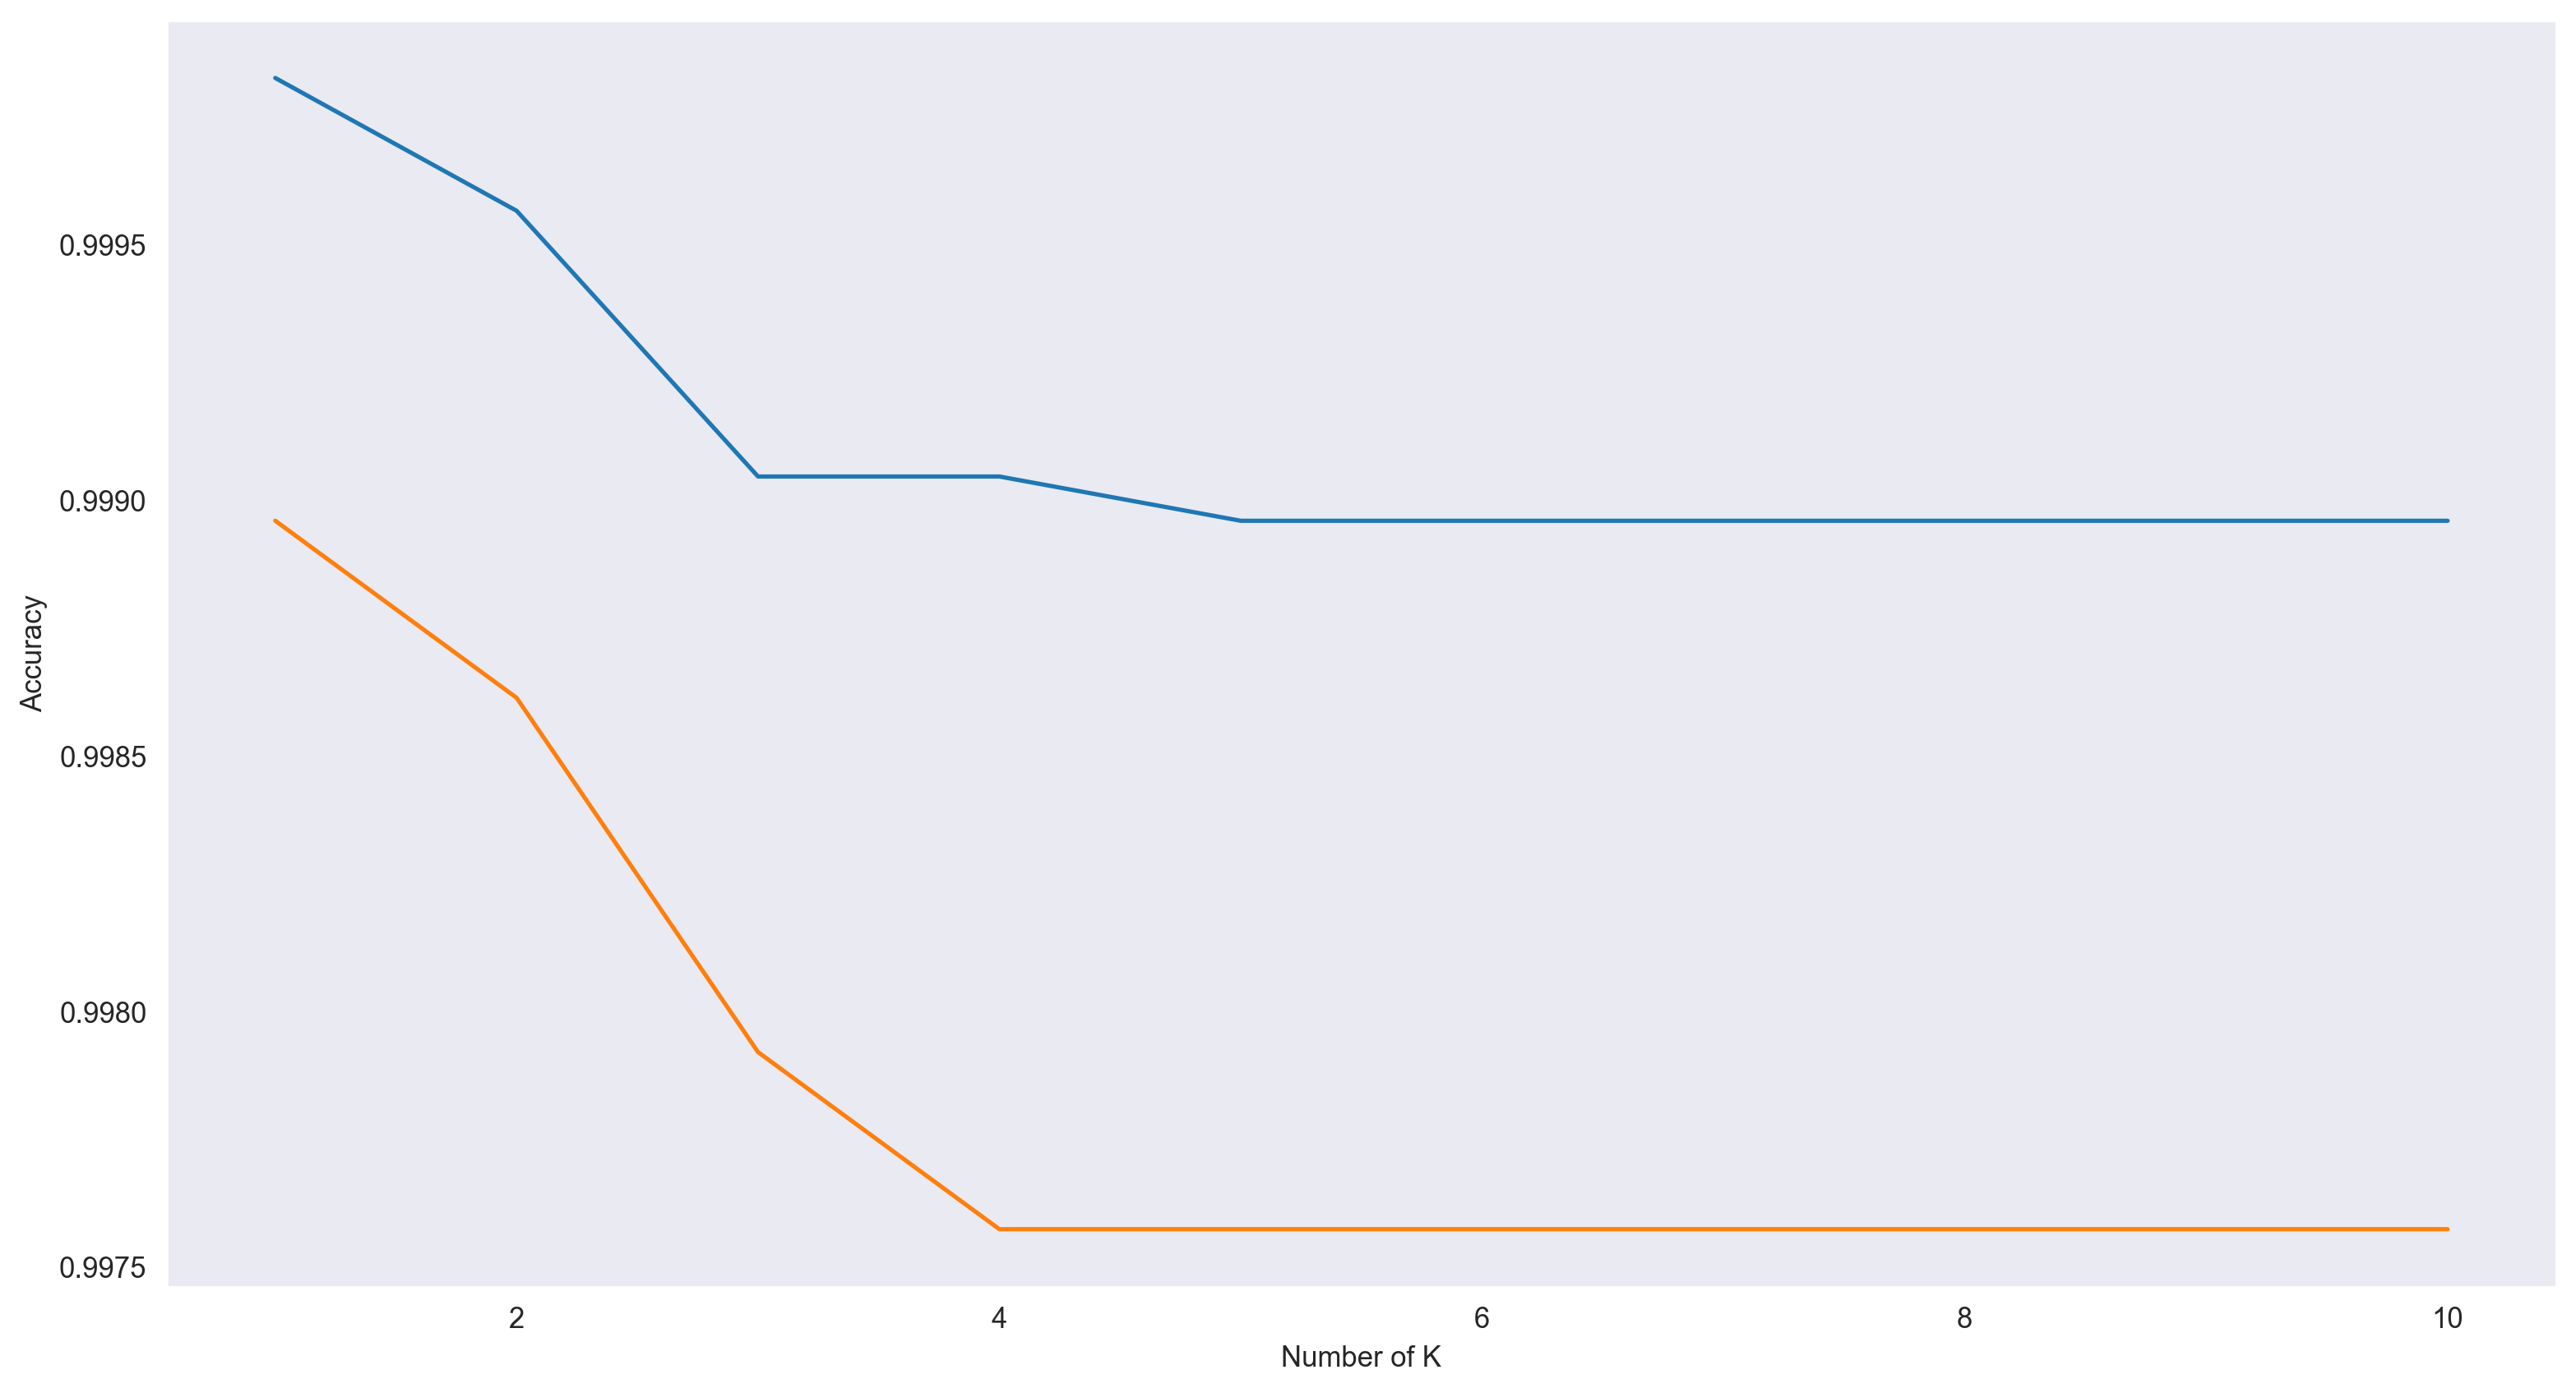

In [15]:
trainac = []
testac = []

for i in range(1,11):
    knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=i),n_estimators = 10)
    knn.fit(x_train,y_train)
    ypred = knn.predict(x_test)

    trainac.append(knn.score(x_train,y_train))
    testac.append(knn.score(x_test,y_test))

plt.title('')
plt.plot(range(1,11),trainac)
plt.plot(range(1,11), testac)
plt.xlabel('Number of K')
plt.ylabel('Accuracy')
plt.grid()

In [16]:
predict(KNeighborsClassifier(n_neighbors=4))

Creating Model With KNeighborsClassifier(n_neighbors=4)
Training Accuracy of are Model is : 1.0%
Testing Accuracy of are Model is : 1.0%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2871
           1       1.00      0.53      0.70        15

    accuracy                           1.00      2886
   macro avg       1.00      0.77      0.85      2886
weighted avg       1.00      1.00      1.00      2886



#### Tuning SVC

In [17]:
params = {
    'kernel' : ['poly','rbf','linear','sigmoid'],
    'C' : [0.1,0.001,0.0001,1,10],
    'gamma' : [0.1,0.001,1,10]
}

In [18]:
grid = GridSearchCV(SVC(), param_grid=params, verbose=1, n_jobs=-1)

grid.fit(x_train,y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 0.001, 0.0001, 1, 10],
                         'gamma': [0.1, 0.001, 1, 10],
                         'kernel': ['poly', 'rbf', 'linear', 'sigmoid']},
             verbose=1)

In [21]:
grid.best_params_

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

In [22]:
predict(SVC())

Creating Model With SVC()
Training Accuracy of are Model is : 1.0%
Testing Accuracy of are Model is : 1.0%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2871
           1       1.00      0.40      0.57        15

    accuracy                           1.00      2886
   macro avg       1.00      0.70      0.78      2886
weighted avg       1.00      1.00      1.00      2886



### Creating Final Model With Hyperparameter Value

In [21]:
final_model = RandomForestClassifier( criterion = 'gini',  max_depth = 5,  max_features = 'log2',  min_samples_leaf = 1,
                                min_samples_split = 4,  min_weight_fraction_leaf = 0,  n_estimators= 10)

final_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, max_features='log2', min_samples_split=4,
                       min_weight_fraction_leaf=0, n_estimators=10)

##### Comparing Training And Testing Accuracy

In [22]:
print('Training Accuracy of are Model is : ' + str(round(final_model.score(x_train,y_train),2))+' %')
print('Testing Accuracy of are Model is : ' + str(round(final_model.score(x_test, y_test),2))+' %')

Training Accuracy of are Model is : 1.0 %
Testing Accuracy of are Model is : 1.0 %


## Creating Model

In [ ]:
pickle.dump(final_model, open('model.pkl','wb'))